# Prerequisites

If you were running this on your own machine you would have
to install jupyter, neuroconv package and the data.

However, if you are using either binder or github codespaces for the workshop these steps have already been done for you so you don't need to install anything.

# NWB workshop
## Loading and plotting NWB files

In this section, you will load NWB datasets that you have already explored with the no-code tool "GUIDE".

### Ex 1:
Load a behavior dataset acquired with BASIL, look at the data structure and plot timeseries


In [2]:
from pynwb import NWBHDF5IO
folder_path = "/home/jovyan/data_nwb/BASIL/sub-390_ses-17.nwb"
io = NWBHDF5IO(folder_path, mode='r')
nwbfile = io.read()
nwbfile

Data type,float64
Shape,"(3845900,)"
Array size,29.34 MiB
Chunk shape,"(1250000,)"
Compression,gzip
Compression opts,4
Compression ratio,4.764938015322598
Data type,float64
Shape,"(38459,)"
Array size,300.46 KiB
Chunk shape,"(38459,)"


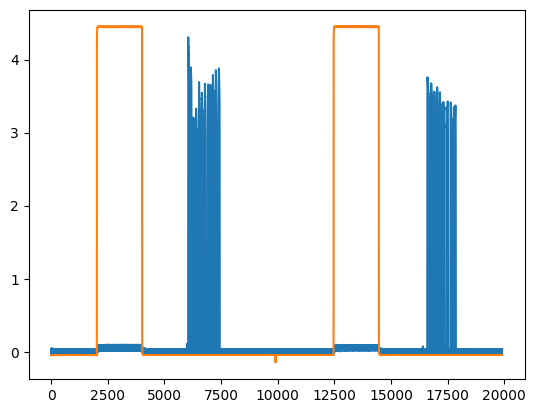

In [3]:
import matplotlib.pyplot as plt
plt.plot(nwbfile.acquisition['Lick'].data[100:20000])
plt.plot(nwbfile.acquisition['TTLtrigsounds'].data[100:20000])

### Ex 2:
Load an electrophysiology dataset (acquired with spikeglx) and preprocessing (performed with Kilosort), together with behavior/stimuli data (BASIL). Dataset courtesy : Pierre Platel.

Look at the data structure and plot ephy raster plot


In [1]:
#folder_path = "/home/jovyan/data_nwb/ephy/spikeglx_kilosort_BASIL_NWBfile.nwb"
folder_path = "C:/Users/cdussaux/OneDrive - Institut Pasteur Paris/Bureau/WorkshopNWB/4-OpenEphys_phy_basil/spikeglx_kilosort_BASIL_NWBfile.nwb"
io = NWBHDF5IO(folder_path, mode='r')
nwbfile = io.read()
nwbfile

root pynwb.file.NWBFile at 0x1718496619040
Fields:
  acquisition: {
    ElectricalSeriesAP <class 'pynwb.ecephys.ElectricalSeries'>,
    Lick <class 'pynwb.base.TimeSeries'>,
    Parameters <class 'hdmf.common.table.DynamicTable'>,
    Reward <class 'pynwb.base.TimeSeries'>,
    TTLtrignpx <class 'pynwb.base.TimeSeries'>,
    TTLtrigsounds <class 'pynwb.base.TimeSeries'>,
    TrialType <class 'pynwb.base.TimeSeries'>
  }
  devices: {
    NeuropixelImec0 <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    Imec0 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  file_create_date: [datetime.datetime(2025, 2, 3, 12, 42, 26, 800093, tzinfo=tzoffset(None, 3600))]
  identifier: e4af9f67-7b43-4f59-bb88-7046a9c604e4
  session_start_time: 2025-01-31 12:30:00-08:00
  source_script: Created using NeuroConv v0.6.6
  source_script_file_name: c:\Users\cdussaux\Documents\Python\neuroconv\Lib\site-packages\neuroconv\basedatainterface.py
  stimulus: {
    SoundCopy <class 'pynwb.base.TimeSeries'>
  }
  timestamps_reference_time: 2025-01-31 12:30:00-08:00
  units: units <class 'pynwb.misc.Units'>

In [2]:
import numpy as np

units = nwbfile.units
units_spike_times = units["spike_times"]
# bin size for counting spikes
time_resolution = 0.01

# start and end times (relative to the stimulus at 0 seconds) that we want to examine and align spikes to
window_start_time = -0.1
window_end_time = 2

# time bins used
n_bins = int((window_end_time - window_start_time) / time_resolution)
bin_edges = np.linspace(window_start_time, window_end_time, n_bins, endpoint=True)

# useful throughout analysis
n_units = len(units_spike_times)

In [3]:
n_trials = 1

# 3D spike matrix to be populated with spike counts
spike_matrix = np.zeros((n_units, len(bin_edges), n_trials))

# populate 3D spike matrix for each unit for each stimulus trial by counting spikes into bins
for unit_idx in range(n_units):
    spike_times = units_spike_times[unit_idx]
    
    # get spike times that fall within the bin's time range relative to the stim time        
    first_bin_time = bin_edges[0]
    last_bin_time = bin_edges[-1]
    first_spike_in_range, last_spike_in_range = np.searchsorted(spike_times, [first_bin_time, last_bin_time])
    spike_times_in_range = spike_times[first_spike_in_range:last_spike_in_range]

    # convert spike times into relative time bin indices
    bin_indices = ((spike_times_in_range - (first_bin_time)) / time_resolution).astype(int)
    
    # mark that there is a spike at these bin times for this unit on this stim trial
    for bin_idx in bin_indices:
        spike_matrix[unit_idx, bin_idx, 0] += 1

spike_matrix.shape

(445, 210, 1)

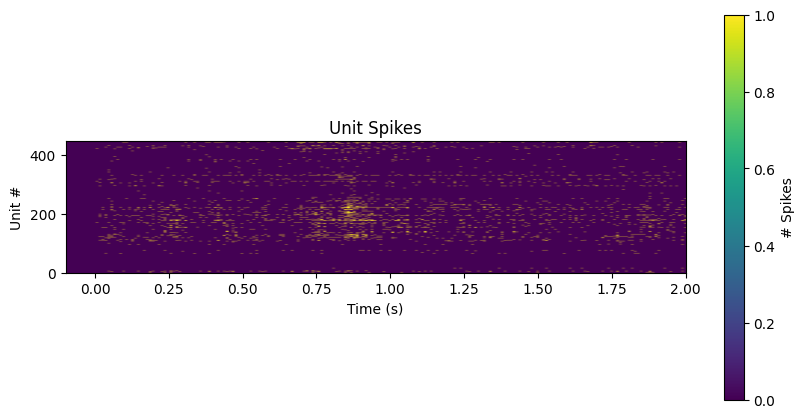

In [4]:
import matplotlib.pyplot as plt

trial = 0
fig, ax = plt.subplots(figsize=(10,10))

ax.set_title("Unit Spikes")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Unit #")

img = ax.imshow(spike_matrix[:,:,trial], extent=[window_start_time,window_end_time,0,n_units], aspect=0.001, vmin=0, vmax=1)
cbar = fig.colorbar(img, shrink=0.5)
cbar.set_label("# Spikes")

### Ex 3:
Load an optical imaging dataset and preprocessing (performed with Suite2P).

Dataset from dandi.

Look at the data structure and plot calcium imaging raster plot

In [6]:
#folder_path = "/home/jovyan/data_nwb/ophy/sub-171029-171110_ses-171110-a000_behavior+ophys.nwb"
folder_path = "C:/Users/cdussaux/OneDrive - Institut Pasteur Paris/Bureau/WorkshopNWB/3-2P_behavior/dandi/sub-171029-171110_ses-171110-a000_behavior+ophys.nwb"
io = NWBHDF5IO(folder_path, mode='r')
nwbfile = io.read()
nwbfile

c:\Users\cdussaux\Documents\Python\neuroconv\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\cdussaux\Documents\Python\neuroconv\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.3.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\cdussaux\Documents\Python\neuroconv\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


root pynwb.file.NWBFile at 0x1718519860976
Fields:
  acquisition: {
    ci_frames <class 'pynwb.base.TimeSeries'>,
    motion_corrected_ci_movie <class 'pynwb.ophys.TwoPhotonSeries'>
  }
  devices: {
    2P_device <class 'pynwb.device.Device'>
  }
  experiment_description: In-vivo 2P calcium imaging on head fixed mouse pup
  experimenter: ['RD']
  file_create_date: [datetime.datetime(2022, 2, 20, 19, 46, 50, 158511, tzinfo=tzoffset(None, 3600))]
  identifier: P12D_171029_171110_171110_a000
  imaging_planes: {
    my_imgpln <class 'pynwb.ophys.ImagingPlane'>
  }
  institution: INMED - INSERMU1249
  intervals: {
    ci_recording_on_pause <class 'pynwb.epoch.TimeIntervals'>,
    invalid_times <class 'pynwb.epoch.TimeIntervals'>
  }
  invalid_times: invalid_times <class 'pynwb.epoch.TimeIntervals'>
  keywords: <StrDataset for HDF5 dataset "keywords": shape (2,), type "|O">
  notes: No given note for this NWB
  pharmacology: Anesthesia: Isoflurane 1-3% in a 90% O2 / 10% air mix,  Painkillers: Buprenorphine [0.05-0.1] mg.kg-1
  processing: {
    behavior <class 'pynwb.base.ProcessingModule'>,
    ophys <class 'pynwb.base.ProcessingModule'>
  }
  session_description: Session: 171110_a000, from subject: 171029_171110
  session_id: 171110_a000
  session_start_time: 2017-11-10 00:00:00+01:00
  subject: subject pynwb.file.Subject at 0x1718515613328
Fields:
  age: P12D
  date_of_birth: 2017-10-29 00:00:00+02:00
  genotype: GadCreGCaMP leak
  sex: U
  species: Mus musculus
  strain: SWISS
  subject_id: 171029_171110
  weight: 7.0

  surgery: Performed by RD on 11/10/17
  timestamps_reference_time: 2017-11-10 00:00:00+01:00

In [18]:
X = nwbfile.processing['ophys']
Y = X.data_interfaces['fluorescence_all_cells']
Z = Y.roi_response_series['raster dur v26_5_v37_6']

timestamps = Z.timestamps
data = Z.data

print(f'timestamps shape: {timestamps.shape}')
print(f'data shape: {data.shape}')
n_cells = data.shape[1]


timestamps shape: (12500,)
data shape: (12500, 404)


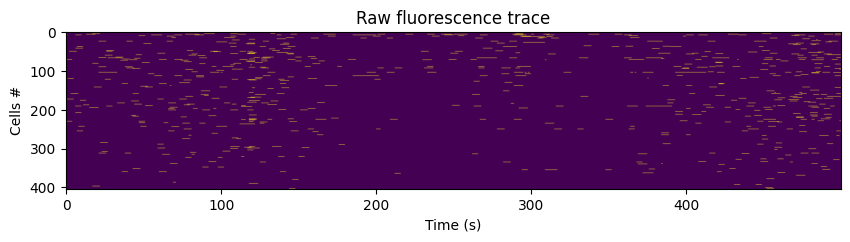

In [24]:
fig, ax = plt.subplots(figsize=(10,10))

ax.set_title("Raw fluorescence trace")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Cells #")

img = ax.imshow(np.transpose(data[0:500,:]), aspect=0.25, vmin=0, vmax=1)
cbar.set_label("# Spikes")

## Converting to NWB with neuroconv

We will deal with three problems that we think arise often.
The first one is having a type of data that you would like
to convert to NWB format and for which there is already a converter in [<img src=https://neuroconv.readthedocs.io/en/main/_images/neuroconv_logo.png width=50 height=50>](https://neuroconv.readthedocs.io/en/main/) The available converters can be found
in the neuroconv [gallery](https://neuroconv.readthedocs.io/en/main/conversion_examples_gallery/index.html).
The second one is that you already 
have an NWB file and some data you would like to add to the NWB file for which there is an neuroconv datainterface. The third problem is that you have an NWB file and you would like to
extract some data from the file.


### Problem 1a:
We will start with the simplest case scenario.
We have a single source of data. The data that we have
are from a csv file, 
to convert them to NWB we will use the [`CsvTimeIntervalsInterface`](https://neuroconv.readthedocs.io/en/main/conversion_examples_gallery/text/csv.html) from neuroconv.

In [ ]:
# Import requirement for the conversion
from neuroconv.datainterfaces import CsvTimeIntervalsInterface
from datetime import datetime
from zoneinfo import ZoneInfo
from pathlib import Path

#### Create CSV file if not available

In [ ]:
import random
import pandas as pd
data_dir = Path("../data") # Data path
data_dir.mkdir(exist_ok=True) # Create data dir
csv_file_path = data_dir / "mydata.csv" # Form file data path
random.seed(42) # set seed
i = 0
starts  = []
ends  = []
vals = []
s0 = 0
shift = 0.00001
while (not ends) or ends[-1] < 120 :
    starts.append(s0 + random.randrange(1,4))
    end = starts[-1] + random.randrange(1,8)
    vals.append(random.uniform(0,1))
    s0 = end
    ends.append(end)
trial_times = pd.DataFrame({'start_time':starts, 'end_time':ends, 'value':vals })
# Write csv file if it doesn't exist
if not csv_file_path.exists():
    trial_times.to_csv(csv_file_path,index=False)

In [ ]:
### Show first 5 lines of csv file
pd.read_csv(csv_file_path).head()

In [ ]:
!head -n6 ../data/mydata.csv

#### Create interface

In [ ]:
csv_interface = CsvTimeIntervalsInterface(file_path=csv_file_path, verbose=False)

#### Get metadata

In [ ]:
metadata = csv_interface.get_metadata()
metadata

#### Attempt to create NWB file

In [ ]:
prob1a_nwb_file = data_dir/"problem_1a.nwb"
csv_interface.run_conversion(nwbfile_path = prob1a_nwb_file)

#### Add missing metadata

In [ ]:
session_start_time = datetime(2025,1,10,11,45,0, tzinfo=ZoneInfo("Europe/Paris"))
metadata["NWBFile"]["session_start_time"] = session_start_time

#### Create NWB file

In [ ]:
csv_interface.run_conversion(nwbfile_path = prob1a_nwb_file, metadata=metadata)

#### Look at the generated NWB file

In [ ]:
from pynwb import NWBHDF5IO
import pynwb

In [ ]:
# Ideally we would use a with statement 
# as in the commented code
#
## with NWBHDF5IO(prob1a_nwb_file, mode = 'r') as io:
##    nwbfile = io.read()
##    nwbfile
# we instead use the code below to be able to
# see a nice version of the file.
io = NWBHDF5IO(prob1a_nwb_file, mode = 'r')
nwbfile = io.read()
nwbfile

In [ ]:
io.close() # Don't forget to close the file

#### Use nwbwidgets to look at the file
Just a taste of how nwbwidgets work, we will take a closer look at nwbwidgets later on.

In [ ]:
from nwbwidgets import nwb2widget

io = NWBHDF5IO(prob1a_nwb_file, mode = 'r')
nwbfile = io.read()
nwb2widget(nwbfile)

In [ ]:
io.close()

#### Use h5py to look at the file

In [ ]:
import h5py
f = h5py.File(prob1a_nwb_file, 'r')

In [ ]:
list(f.keys())

In [ ]:
my_intervals = f.get('intervals')
my_print = lambda x,_: print(x)
my_intervals.visititems(my_print)
print(my_intervals.get('trials').get('value')[:])

In [ ]:
f.close()

###  Problem 1b
Now we again want to generate a NWBFile from already available data.
However, in addition to the csv file with some tiff images that 
should also be inside the generated NWB file.
#### Download tiff file

In [ ]:
%%bash
# Download movie file if not already available
if [[ ! -e "../data/demoMovie.tif" ]]; then
   wget https://github.com/flatironinstitute/CaImAn/raw/refs/heads/main/example_movies/demoMovie.tif -O ../data/demoMovie.tif
fi        

In [ ]:
from neuroconv.datainterfaces import TiffImagingInterface
from neuroconv import NWBConverter
movie_path = data_dir / 'demoMovie.tif'
prob1b_nwb_file = data_dir / 'problem_1b.nwb'


class MyConverter(NWBConverter):
    data_interface_classes = dict (
        csvIntervals = CsvTimeIntervalsInterface,
        movieRecording = TiffImagingInterface )

sourceData = dict(
      csvIntervals = dict(file_path=csv_file_path),
      movieRecording = dict(file_path=movie_path, sampling_frequency=15.0))

dual_converter = MyConverter(sourceData)

metadata = dual_converter.get_metadata()
metadata

In [ ]:
metadata["NWBFile"]["session_start_time"] = session_start_time
dual_converter.run_conversion(metadata=metadata, nwbfile_path=prob1b_nwb_file)

### Problem 2
In this problem we have an NWB file with some data (the file we
created in problem 1a) and we have acquired some new data the tiff
file from problem 1b). We want to have all the data in a single file.
We will use two approaches:
1. Append the data to an existing nwb file on disk.
2. Create a new nwb file in memory file and save it.

#### Create an appropriate interface
First we create an appropriate interface

In [ ]:
tiff_interface = TiffImagingInterface(file_path=movie_path, sampling_frequency=15.0)

#### Append data to an existing NWB file
We copy the file we created in problem 1a

In [ ]:
# First we create a copy of the file we created in  problem 1a
import shutil
prob2a_nwb_file = data_dir / "problem_2a.nwb"

shutil.copyfile(prob1a_nwb_file, prob2a_nwb_file)

In [ ]:
tiff_interface.run_conversion(prob2a_nwb_file)

#### Create an NWB file in memory and save it

In [ ]:
prob2b_nwb_file = data_dir / "problem_2b.nwb"
with NWBHDF5IO(prob1a_nwb_file, mode = 'r') as fin, NWBHDF5IO(prob2b_nwb_file, mode = 'w' ) as fout:
    prob1a = fin.read() # Read nwb file from prob1a
    tiff_interface.add_to_nwbfile(prob1a) # Add the photon information to prob1a, modifies in place
    fout.export(fin, nwbfile=prob1a) # Export the new file

### Problem 3

In this problem we are looking at the scenario where we have an NWB file already. 
However, we would like to remove some information and save the result as an NWB file.
We will start with the NWB file we created in problem 1b and remove the TwoPhotonSeries
from acquisition. Not you can pop items only from LabelledDict items.

In [ ]:
fin = NWBHDF5IO(prob1b_nwb_file, mode = 'r')
prob1b = fin.read()
prob1b

In [ ]:
type(prob1b.acquisition)

In [ ]:
two_photon = prob1b.acquisition.pop('TwoPhotonSeries')
prob1b

In [ ]:
prob3_nwb_file = data_dir / "problem_3.nwb"
with NWBHDF5IO(prob3_nwb_file, mode = 'w' ) as fout:
    fout.export(fin, nwbfile=prob1b) 

In [ ]:
fin.close()

## NWBwidgets
A closer look at NWB widgets. We will look at somefile from the DANDI archive. Select DANDI using the radio button. Then select dandiset 4, from the dataset we will look at the nwb file for sub-P27CS

In [ ]:
from nwbwidgets.panel import Panel
Panel()

# Writing your own neuroconv interface
We will take a look on how to write a simple neuroconv interface.
Let's assume we have some TTL signals that we have saved in a matlab file.
We would like to create an interface to convert such files to the nwb format.

## Create a mat file with the data to test our code
We will create a mat file with some random data the file will also include
a label, and a frequency.

In [ ]:
import numpy as np
from scipy.io import savemat
data = np.outer(
    np.random.choice(a=[0,1], p=[0.8, 0.2],replace=True, size=100), 
    np.ones(10)).reshape(-1)
matdict = {'data': data, 'freq': 1000, 'label':'TTLStrobe'}
savemat(data_dir/"test.mat", matdict)

In [ ]:
from scipy.io import loadmat
res = loadmat(data_dir/"test.mat")
#res['freq'][0][0]
#res['label'][0]
res

## Looking at BaseDataInterface
You can seee that is an Abstract data class and that we need to overwrite the `add_to_nwbfile`
and `__init__` method of the BaseDataInterface.

```
class BaseDataInterface(ABC):
    """Abstract class defining the structure of all DataInterfaces."""

    display_name: Union[str, None] = None
    keywords: tuple[str] = tuple()
    associated_suffixes: tuple[str] = tuple()
    info: Union[str, None] = None

    @classmethod
    def get_source_schema(cls) -> dict:
        """Infer the JSON schema for the source_data from the method signature (annotation typing)."""
        return get_json_schema_from_method_signature(cls, exclude=["source_data"])

    @classmethod
    def validate_source(cls, source_data: dict, verbose: bool = False):
        """Validate source_data against Converter source_schema."""
        cls._validate_source_data(source_data=source_data, verbose=verbose)

    def _validate_source_data(self, source_data: dict, verbose: bool = False):

        encoder = _NWBSourceDataEncoder()
        # The encoder produces a serialized object, so we deserialized it for comparison

        serialized_source_data = encoder.encode(source_data)
        decoded_source_data = json.loads(serialized_source_data)
        source_schema = self.get_source_schema()
        validate(instance=decoded_source_data, schema=source_schema)
        if verbose:
            print("Source data is valid!")

    @validate_call
    def __init__(self, verbose: bool = False, **source_data):
        self.verbose = verbose
        self.source_data = source_data

        self._validate_source_data(source_data=source_data, verbose=verbose)

    def get_metadata_schema(self) -> dict:
        """Retrieve JSON schema for metadata."""
        metadata_schema = load_dict_from_file(Path(__file__).parent / "schemas" / "base_metadata_schema.json")
        return metadata_schema

    def get_metadata(self) -> DeepDict:
        """Child DataInterface classes should override this to match their metadata."""
        metadata = DeepDict()
        metadata["NWBFile"]["session_description"] = ""
        metadata["NWBFile"]["identifier"] = str(uuid.uuid4())

        # Add NeuroConv watermark (overridden if going through the GUIDE)
        neuroconv_version = importlib.metadata.version("neuroconv")
        metadata["NWBFile"]["source_script"] = f"Created using NeuroConv v{neuroconv_version}"
        metadata["NWBFile"]["source_script_file_name"] = __file__  # Required for validation

        return metadata

    def validate_metadata(self, metadata: dict, append_mode: bool = False) -> None:
        """Validate the metadata against the schema."""
        encoder = _NWBMetaDataEncoder()
        # The encoder produces a serialized object, so we deserialized it for comparison

        serialized_metadata = encoder.encode(metadata)
        decoded_metadata = json.loads(serialized_metadata)
        metdata_schema = self.get_metadata_schema()
        if append_mode:
            # Eliminate required from NWBFile
            nwbfile_schema = metdata_schema["properties"]["NWBFile"]
            nwbfile_schema.pop("required", None)

        validate(instance=decoded_metadata, schema=metdata_schema)

    def get_conversion_options_schema(self) -> dict:
        """Infer the JSON schema for the conversion options from the method signature (annotation typing)."""
        return get_json_schema_from_method_signature(self.add_to_nwbfile, exclude=["nwbfile", "metadata"])

    def create_nwbfile(self, metadata: Optional[dict] = None, **conversion_options) -> NWBFile:
        """
        Create and return an in-memory pynwb.NWBFile object with this interface's data added to it.

        Parameters
        ----------
        metadata : dict, optional
            Metadata dictionary with information used to create the NWBFile.
        **conversion_options
            Additional keyword arguments to pass to the `.add_to_nwbfile` method.

        Returns
        -------
        nwbfile : pynwb.NWBFile
            The in-memory object with this interface's data added to it.
        """
        if metadata is None:
            metadata = self.get_metadata()

        nwbfile = make_nwbfile_from_metadata(metadata=metadata)
        self.add_to_nwbfile(nwbfile=nwbfile, metadata=metadata, **conversion_options)

        return nwbfile

    @abstractmethod
    def add_to_nwbfile(self, nwbfile: NWBFile, **conversion_options) -> None:
        """
        Define a protocol for mapping the data from this interface to NWB neurodata objects.

        These neurodata objects should also be added to the in-memory pynwb.NWBFile object in this step.

        Parameters
        ----------
        nwbfile : pynwb.NWBFile
            The in-memory object to add the data to.
        **conversion_options
            Additional keyword arguments to pass to the `.add_to_nwbfile` method.
        """
        raise NotImplementedError

    def run_conversion(
        self,
        nwbfile_path: FilePath,
        nwbfile: Optional[NWBFile] = None,
        metadata: Optional[dict] = None,
        overwrite: bool = False,
        backend: Optional[Literal["hdf5", "zarr"]] = None,
        backend_configuration: Optional[Union[HDF5BackendConfiguration, ZarrBackendConfiguration]] = None,
        **conversion_options,
    ):
        """
        Run the NWB conversion for the instantiated data interface.

        Parameters
        ----------
        nwbfile_path : FilePathType
            Path for where the data will be written or appended.
        nwbfile : NWBFile, optional
            An in-memory NWBFile object to write to the location.
        metadata : dict, optional
            Metadata dictionary with information used to create the NWBFile when one does not exist or overwrite=True.
        overwrite : bool, default: False
            Whether to overwrite the NWBFile if one exists at the nwbfile_path.
            The default is False (append mode).
        backend : {"hdf5", "zarr"}, optional
            The type of backend to use when writing the file.
            If a `backend_configuration` is not specified, the default type will be "hdf5".
            If a `backend_configuration` is specified, then the type will be auto-detected.
        backend_configuration : HDF5BackendConfiguration or ZarrBackendConfiguration, optional
            The configuration model to use when configuring the datasets for this backend.
            To customize, call the `.get_default_backend_configuration(...)` method, modify the returned
            BackendConfiguration object, and pass that instead.
            Otherwise, all datasets will use default configuration settings.
        """

        backend = _resolve_backend(backend, backend_configuration)
        no_nwbfile_provided = nwbfile is None  # Otherwise, variable reference may mutate later on inside the context

        if metadata is None:
            metadata = self.get_metadata()

        file_initially_exists = Path(nwbfile_path).exists() if nwbfile_path is not None else False
        append_mode = file_initially_exists and not overwrite

        self.validate_metadata(metadata=metadata, append_mode=append_mode)

        with make_or_load_nwbfile(
            nwbfile_path=nwbfile_path,
            nwbfile=nwbfile,
            metadata=metadata,
            overwrite=overwrite,
            backend=backend,
            verbose=getattr(self, "verbose", False),
        ) as nwbfile_out:
            if no_nwbfile_provided:
                self.add_to_nwbfile(nwbfile=nwbfile_out, metadata=metadata, **conversion_options)

            if backend_configuration is None:
                backend_configuration = self.get_default_backend_configuration(nwbfile=nwbfile_out, backend=backend)

            configure_backend(nwbfile=nwbfile_out, backend_configuration=backend_configuration)

    @staticmethod
    def get_default_backend_configuration(
        nwbfile: NWBFile,
        # TODO: when all H5DataIO prewraps are gone, introduce Zarr safely
        # backend: Union[Literal["hdf5", "zarr"]],
        backend: Literal["hdf5"] = "hdf5",
    ) -> Union[HDF5BackendConfiguration, ZarrBackendConfiguration]:
        """
        Fill and return a default backend configuration to serve as a starting point for further customization.

        Parameters
        ----------
        nwbfile : pynwb.NWBFile
            The in-memory object with this interface's data already added to it.
        backend : "hdf5", default: "hdf5"
            The type of backend to use when creating the file.
            Additional backend types will be added soon.

        Returns
        -------
        backend_configuration : HDF5BackendConfiguration or ZarrBackendConfiguration
            The default configuration for the specified backend type.
        """
        return get_default_backend_configuration(nwbfile=nwbfile, backend=backend)


```

## Imports 
We will use the following imports in constructing our class.
The notebook format is not really appropriate for creating 
a class, this is something you would likely want to do
as a python module. You are only using the notebook presentation
for ease of use and convenience.

In [ ]:
from typing import Optional
from neuroconv import BaseDataInterface
from pydantic import FilePath
from pydantic.validate_call_decorator import validate_call
from scipy.io import loadmat
from pynwb import NWBFile, TimeSeries

## Extend base data interface class

In [ ]:
class MatTTL(BaseDataInterface):
    """ My class to convert matlab files to TLL"""
    

In [ ]:
MatTTL(True)

In [ ]:
class MatTTL(BaseDataInterface):
    """ My class to convert matlab files to TLL"""
    

    def add_to_nwbfile(self, nwbfile: NWBFile, metadata: Optional[dict], **conversion_options) -> None:
        """
        Define a protocol for mapping the data from this interface to NWB neurodata objects.

        These neurodata objects should also be added to the in-memory pynwb.NWBFile object in this step.

        Parameters
        ----------
        nwbfile : pynwb.NWBFile
            The in-memory object to add the data to.
        **conversion_options
            Additional keyword arguments to pass to the `.add_to_nwbfile` method.
        """
        ts = TimeSeries(name=self.name, 
                        data=self.data, 
                        unit="V", 
                        starting_time=self.starting_time, 
                        rate= self.rate)
        nwbfile.add_acquisition(ts)

In [ ]:
MatTTL(verbose=True)

In [ ]:


class MatTTL(BaseDataInterface):
    """ My class to convert matlab files to TTL """
    @validate_call
    def __init__(self,
                 file_path: FilePath,
                 verbose: bool = True
                 ):
        super().__init__(verbose,file_path=file_path)
        res = loadmat(file_path) # Read matlab file
        self.starting_time = 0.0 # Assume that starting time is alway the start time of the session
        self.name = res.get('label', ['TTLSignal'])[0]
        self.rate = float(res.get('freq', [[1000]])[0][0])
        self.data = res.get('data')

    def add_to_nwbfile(self, nwbfile: NWBFile, metadata: Optional[dict], **conversion_options) -> None:
        ts = TimeSeries(name=self.name, 
                        data=self.data, 
                        unit="V", 
                        starting_time=self.starting_time, 
                        rate= self.rate)
        nwbfile.add_acquisition(ts)


In [ ]:
MatTTL(file_path=data_dir/"test.mat", verbose=True)

In [ ]:
import datetime
from zoneinfo import ZoneInfo
mat_file = data_dir/"test.mat"
mat_nwb_file = data_dir /"test.nwb"
mat_interface = MatTTL(file_path=mat_file, verbose=True)
metadata = mat_interface.get_metadata()
metadata['NWBFile']['session_start_time'] = datetime.datetime.now(tz=ZoneInfo("Europe/Paris"))
mat_interface.run_conversion(mat_nwb_file, metadata= metadata)

In [ ]:
from pynwb import NWBHDF5IO
fin = NWBHDF5IO(mat_nwb_file, mode = 'r')
mat_nwb = fin.read()
mat_nwb

In [ ]:
fin.close()

## Pynapple
Pynapple is python package aiming to make timeseries analysis easier

#### Create some data series
We start by creating some data series that we will 
use down the line to show some of the pynapple functionality

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pynwb import TimeSeries, NWBHDF5IO, NWBFile
from pathlib import Path
data_dir = Path("../data")
prob1b_nwb_file = data_dir / "problem_1b.nwb"

t = 200.0 # We will make our longest time series to be 200 seconds
# Sample rates in Hz
f1 = 48000.0 
f2 = 96000.0
f3 = 44100.0
# Time series starts
s1 = 10.0
s3=s2 = 0.0
# The time series objects
y1 = TimeSeries("sin48k",
                data=np.sin(np.linspace(s1,t,num=int((t-s1)*f1))),
                unit = "V",
                starting_time=s1,
                rate=f1)


y2= TimeSeries("sin96k",
                data=np.sin(np.linspace(s2,t,num=int((t-s2)*f2))),
                unit = "V",
                starting_time=s2,
                rate=f2)
              
over_line = t + 20
y3 = TimeSeries("sin44p1k",
                data=np.sin(np.linspace(s3,over_line-s3,num=int((over_line-s3)*f3))),
                starting_time=s3,
                unit = "V",
                rate=f3)

y4 = TimeSeries("noise", 
                data=np.random.uniform(0,2,int(t*f3)),
                rate=f3,
                unit = "V",
                starting_time=s2)
# Put all the time series in a an array
my_timeseries = [y1, y2, y3, y4]

In [ ]:
with NWBHDF5IO(prob1b_nwb_file, mode = 'a') as fio:
    prob1b = fio.read() # Read nwb file from prob1a
    for tseries in my_timeseries:
        prob1b.add_acquisition(tseries)
    fio.write(prob1b) # Export the appended file

In [ ]:
import pynapple as nap
nwb = nap.load_file(prob1b_nwb_file)
# or nwb = nap.NWBFile("../data/test.nwb)
print(nwb)

### Pynapple objects
pynapple provides some objects to make our life easier various types of timeseries.
#### Timeseries
1. 1d timeseries (Tsd)
2. 2d timeseries aka timeframes (TsdFrame)
3. n-dimensional timeseries (TsdTensor)

It also provides some auxiliary objects as time intervals (IntervalSet), timestamps (Ts) and a way to group different timeStamps/1d Timeseries (TsGroup).

In [ ]:
nwb["sin96k"]

In [ ]:
nwb["TwoPhotonSeries"]

### Interval set
We will create the intervals we care. Note that pynapple has a bug and the
data doesn't look right this is just a pretty printer error that hopefully
will be fixed soon.

In [ ]:
intervals = nap.IntervalSet(start=starts, end=ends)
intervals

In [ ]:
intervals[16] # The data stored are correct but the representation above is wrong

### Time support 
All time series have a time support property. You can also set the time support using the restrict method.

In [ ]:
nwb["sin96k"].time_support

In [ ]:
nwb["TwoPhotonSeries"].time_support

### Restrict functionality
We can restrict a timeseries objects to an interval or IntervalSet

In [ ]:
nwb["sin96k"].restrict(intervals[16]) 

In [ ]:
nwb["TwoPhotonSeries"].restrict(intervals)

#### Bin Count and Bin averaging
We can count our data or average per bin. The result timestamps are the bin centers.

In [ ]:
nwb["TwoPhotonSeries"].count(ep=intervals)

In [ ]:
ycur = nwb["sin96k"]
ycur.count(1050,time_units='ms')

In [ ]:
ycur.bin_average(np.pi)

In [ ]:
ycur.bin_average(1,ep=intervals[0:5]) 

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
yp = ycur.restrict(nap.IntervalSet(start=[0],end=[8*np.pi]))
plt.plot(yp)
plt.plot(yp.threshold(0))

### Use numpy function
We can use numpy functionality as shown in the example
below. Note that we are getting a TsdFrame

In [ ]:
yp = np.mean(nwb["TwoPhotonSeries"],1)
print(type(yp))
yp

In [ ]:
plt.plot(yp[:,1:5]) # Convenience in plotting timeseries items (plot the first 4 colums)

### Autocorrelation functions
Pynapple provides an autocorrelation function

In [ ]:
ts_group=nap.TsGroup({0:nwb['sin96k'], 1:nwb['sin48k']},time_support=nap.IntervalSet(start=0,end=15))
print(ts_group)

In [ ]:
autocorrs = nap.compute_autocorrelogram(group=ts_group,binsize=5, windowsize=10)